## Solving FrozenLake-v0 with Reinforcement Learning


    # LEFT = 0 DOWN = 1 RIGHT = 2 UP = 3
    # SFFF
    # FHFH
    # FFFH
    # HFFG

In [1]:
# Import libraries
import gym
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# FrozenLake-v0 Game
env = gym.make('FrozenLake-v0')

/Users/chrisjcc/.virtualenvs/ml/lib/python3.7/site-packages/gym/envs/registration.py:14: PkgResourcesDeprecationWarning: Parameters to load are deprecated.  Call .resolve and .require separately.
  result = entry_point.load(False)


In [3]:
# set game configuration parameters
n_games = 1000 # play 1k games
win_pct = []
scores = []

### Agent takes andom actions

In [5]:
# loop through 1000 games
for i in range(n_games):
    done = False
    obs = env.reset()
    score = 0
    
    while not done: # loop through episodes
        action = env.action_space.sample() # sample random action
        obs, reward, done, info = env.step(action) # steping through the env
        score += reward
        
    # at the end of every eposide we append the scores collected by agent
    scores.append(score)
    
    if i % 10 == 0 :
        # every 10 games we want to keep track of the average win percentage
        average = np.mean(scores[-10:]) 
        win_pct.append(average)

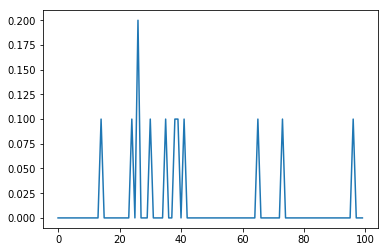

In [7]:
# plot win percentage after all the games
plt.plot(win_pct)
plt.show()

As we can see the Agent with random action perform rather poorly. The majority of the time the agent falls in a hole and occasionally does make it out by sheer random luck. The maximum win percentage we observe is around 10% and varies from run to run some manage to achieve as high as 20%.

### Next agent takes deterministic policy

To represent out policy we can use a dictionary, where the keys correspond to the states while the valeus correspond to the actions. 

In [9]:
# one possible determistic policy we can draft
policy = {0: 1, 1: 2, 2: 1, 3: 0, 4: 1, 6: 1, 8: 2, 9: 1, 10: 1, 13: 2, 14: 2}

In [10]:
# set game configuration parameters
n_games = 1000 # play 1k games
win_pct = []
scores = []

In [11]:
# loop through 1000 games
for i in range(n_games):
    done = False
    obs = env.reset()
    score = 0
    
    while not done: # loop through episodes
        action = policy[obs] # we use our deterministic policy
        obs, reward, done, info = env.step(action) # steping through the env
        score += reward
        
    # at the end of every eposide we append the scores collected by agent
    scores.append(score)
    
    if i % 10 == 0 :
        # every 10 games we want to keep track of the average win percentage
        average = np.mean(scores[-10:]) 
        win_pct.append(average)

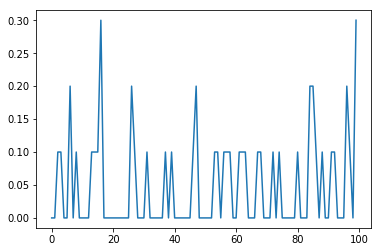

In [12]:
# plot win percentage after all the games
plt.plot(win_pct)
plt.show()

As we can see we get a frequent win rate of 20% doingslightly better then our previous random action Agent. The majority of the time the Agent falls in the hole, and some of the time the Agent manages to make it out 1 out of every 10 times. 

### Agent uses Q-learning algorithm aproach


In [75]:
class Agent():
    def __init__(self, lr, gamma, n_actions, n_states, 
                  eps_start, eps_end, eps_dec):
        self.lr = lr
        self.gamma = gamma
        self.n_actions = n_actions
        self.n_states  = n_states
        self.epsilon   = eps_start
        self.eps_min   = eps_end
        self.eps_dec   = eps_dec
        
        self.Q = {}
        
        self.init_Q()
        
    def init_Q(self):
        for state in range(self.n_states): # rows
            for action in range(self.n_actions): # columns
                self.Q[(state, action)] = 0.0
        
    def choose_action(self, state):
        if np.random.random() < self.epsilon:
            # random action
            action = np.random.choice([i for i in range(self.n_actions)])
        else:
            actions = np.array([self.Q[(state, a)] for a in range(self.n_actions)])
            action  = np.argmax(actions) # greedy action (for actions that ties the action lowest index is returned)
                
        return action
        
    def decrement_epsilon(self): # linear decrement
        self.epsilon = self.epsilon * self.eps_dec if self.epsilon > self.eps_min else self.eps_min
            
    def learn(self, state, action, reward, next_state):
        actions = np.array([self.Q[(next_state, a)] for a in range(self.n_actions)])
        a_max = np.argmax(actions)
        
        # update table of Q-values estimates
        self.Q[(state, action)] += self.lr * (reward + self.gamma * self.Q[(next_state, a_max)] - self.Q[(state, action)])
        
        # decrease the epsilon-greedy action selection
        self.decrement_epsilon()

In [76]:
agent = Agent(lr=0.001, gamma=0.9, eps_start=1.0, eps_end=0.01, 
             eps_dec=0.9999995, n_actions=4, n_states=16)

In [77]:
# set game configuration parameters
win_pct_list = []
scores = []
n_games = 500000 # play 500k games

episode  0 win pct 0.00 episode 1.00
episode  1000 win pct 0.02 episode 1.00
episode  2000 win pct 0.02 episode 0.99
episode  3000 win pct 0.01 episode 0.99
episode  4000 win pct 0.02 episode 0.98
episode  5000 win pct 0.03 episode 0.98
episode  6000 win pct 0.02 episode 0.98
episode  7000 win pct 0.02 episode 0.97
episode  8000 win pct 0.01 episode 0.97
episode  9000 win pct 0.01 episode 0.97
episode  10000 win pct 0.01 episode 0.96
episode  11000 win pct 0.02 episode 0.96
episode  12000 win pct 0.02 episode 0.95
episode  13000 win pct 0.01 episode 0.95
episode  14000 win pct 0.02 episode 0.95
episode  15000 win pct 0.00 episode 0.94
episode  16000 win pct 0.00 episode 0.94
episode  17000 win pct 0.03 episode 0.94
episode  18000 win pct 0.01 episode 0.93
episode  19000 win pct 0.01 episode 0.93
episode  20000 win pct 0.01 episode 0.93
episode  21000 win pct 0.01 episode 0.92
episode  22000 win pct 0.02 episode 0.92
episode  23000 win pct 0.00 episode 0.91
episode  24000 win pct 0.01 e

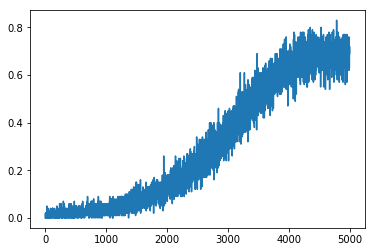

In [78]:
for i in range(n_games):
    done = False
    observation = env.reset() # state
    score = 0.
    
    while not done:
        action = agent.choose_action(observation)
        next_observation, reward, done, info = env.step(action)
        # update agent q-value estimates
        agent.learn(observation, action, reward, next_observation)
        score += reward 
        observation = next_observation
    scores.append(score)
        
    if i % 100 == 0:
        win_pct = np.mean(scores[-100:]) # past 100 episodes
        win_pct_list.append(win_pct)
        if i % 1000 == 0:
            print('episode ', i, 'win pct %.2f' % win_pct, 'episode %.2f' % agent.epsilon)
plt.plot(win_pct_list)
plt.show()

We can see an overall upward trend in the agents win percentage  over the course of the games and it tops out around 70% average with some win rates over 80%.

We are able to achieve a consistent 70% win rate which is a huge improvement over our previous 20% rate from earlier approach. 

### Frozenlake soved naively

In [ ]:
HIDDEN_SIZE = 128
BATCH_SIZE = 16
PERCENTILE = 70

In [ ]:
class DiscreteOneHotWrapper(gym.ObservationWrapper):
    def __init__(self, env):
        super(DiscreteOneHotWrapper, self).__init__(env)
        assert isinstance(env.observation_space, gym.spaces.Discrete)
        self.observation_space = gym.spaces.Box(0.0, 1.0, 
                                                (env.observation_space.n, ), 
                                                dtype=np.float32)
        
    def observation(self, observation):
        res = np.copy(self.observation_space.low)
        res[observation] = 1.0
        return res

In [ ]:
env = DiscreteOneHotWrapper(gym.make("FrozenLake-v0"))
env = gym.wrappers.Monitor(env, directory="mon", force=True)

In [ ]:
obs_size  = env.observation_space.shape[0]
n_actions = env.action_space.n

In [ ]:
net = Net(obs_size, HIDDEN_SIZE, n_actions)
objective = nn.CrossEntropyLoss()
optimizer = optim.Adam(params=net.parameters(), lr=0.01)
writer = SummaryWriter(comment="-frozenlake-naive")

In [ ]:
# training loop
for iter_no, batch in enumerate(iterate_batches(env, net, BATCH_SIZE)):
    
    obs_v, acts_v, reward_b, reward_m = filter_batch(batch, PERCENTILE)

    optimizer.zero_grad()
    
    action_scores_v = net(obs_v)
    
    loss_v = objective(action_scores_v, acts_v)
    loss_v.backward()
    
    optimizer.step()
    
    print("%d: loss=%.3f, reward_mean=%.1f, reward_bound=%.1f" % (
        iter_no, loss_v.item(), reward_m, reward_b))

    writer.add_scalar("loss", loss_v.item(), iter_no)
    writer.add_scalar("reward_bound", reward_b, iter_no)
    writer.add_scalar("reward_mean", reward_m, iter_no)
    
    if reward_m > 0.8:
        print("Solved!")
        break
            
writer.close()

Next we incorporate the calculation of discounted reward and return "elite" episodes, in the training loop, we will store previous "elite" episodes to pass them to the preceding function on the next traiing iteration.

In [ ]:
GAMMA = 0.9

In [ ]:
def filter_batch_discount(batch, eprcentile):
    disc_rewards = list(map(lambda s: s.reward * (GAMMA**len(s.steps)), batch))

    reward_bound = np.percentile(disc_rewards, percentile)
    
    train_obs = []
    train_act = []
    elite_batch = []
    
    for example, discounted_reward in zip(batch, disc_rewards):
        if discounted_reward > reward_bound:
            train_obs.extend(map(lambda step: step.observation, example.steps))
            train_act.extend(map(lambda step: step.action, example.steps))
            elite_batch.append(example)
            
    return elit_batch, train_obs, train_act, reward_bound

In [ ]:
env = gym.envs.toy_text.frozen_lake.FrozenLakeEnv(is_slippery=False)
env = gym.wrappers.TimeLimit(env, max_episode_steps=100)
env = DiscreteOneHotWrapper(env)

env = DiscreteOneHotWrapper(gym.make("FrozenLake-v0"))
env = gym.wrappers.Monitor(env, directory="mon", force=True)

In [ ]:
obs_size = env.observation_space.shape[0]
n_actions = env.action_space.n

In [ ]:
net = Net(obs_size, HIDDEN_SIZE, n_actions)
objective = nn.CrossEntropyLoss()
optimizer = optim.Adam(params=net.parameters(), lr=0.001)
writer = SummaryWriter(comment="-frozenlake-tweaked")
#writer = SummaryWriter(comment="-frozenlake-nonslippery")

In [ ]:
full_batch = []
for iter_no, batch in enumerate(iterate_batches(env, net, BATCH_SIZE)):
    reward_mean = float(np.mean(list(map(lambda s: s.reward, batch))))
    full_batch, obs, acts, reward_bound = filter_batch(full_batch + batch, PERCENTILE)
    
    if not full_batch:
        continue

    obs_v = torch.FloatTensor(obs)
    acts_v = torch.LongTensor(acts)
    full_batch = full_batch[-500:] # last 500 episodes
    
    optimier.zero_grad()

    action_scores_v = net(obs_v)

    loss_v = objective(action_scores_v, acts_v)
    loss_v.backward()

    optimizer.step()
    
    print("%d: loss=%.3f, reward_mean=%.3f, reward_bound=%.3f, batch=%d" % (
            iter_no, loss_v.item(), reward_mean, reward_bound, len(full_batch)))
    
    writer.add_scalar("loss", loss_v.item(), iter_no)
    writer.add_scalar("reward_mean", reward_mean, iter_no)
    writer.add_scalar("reward_bound", reward_bound, iter_no)
    
    if reward_mean > 0.8:
            print("Solved!")
            break
            
    writer.close()
    
env.close()
env.env.close()

To monitor and check the agent in action run the following command to view recorded video at different training steps.

xvfb-run -s "-screen 0 640x480x24" ./01_cartpole.py

### Frozen-lake Value-Iteration

In [6]:
ENV_NAME = "FrozenLake8x8-v0" #"FrozenLake-v0"
GAMMA = 0.9
TEST_EPISODES = 20

In [11]:
class Agent:
    def __init__(self):
        self.env = gym.make(ENV_NAME)
        self.state = self.env.reset()
        
        self.rewards = collections.defaultdict(float)
        self.transits = collections.defaultdict(collections.Counter)
        self.values = collections.defaultdict(float)

    # introducing enough exploration providing stochasticity        
    def play_n_random_steps(self, count):
        '''
        ues selection action find the best action to take and plays one 
        full episode using the provided environment, use to play test episodes without
        effecting the current state of the main evironment used to gather random data.
        '''
        for _ in range(count):
            action = self.env.action_space.sample()
            
            new_state, reward, is_done, _ = self.env.step(action)
            
            self.rewards[(self.state, action, new_state)] = reward
            self.transits[(self.state, action)][new_state] += 1
            
            self.state = self.env.reset() if is_done else new_state
            
    # Calculate/Approximate value for each state and action using Bellman equation
    def calc_action_value(self, state, action): # not used in Q-learning (or Q-iteration??) approach replaced by value table
        target_counts = self.transits[(state, action)]
        total = sum(target_counts.values())
        action_value = 0.0
        
        for tgt_state, count in target_counts.items():
            reward = self.rewards[(state, action, tgt_state)]
            action_value += (count / total) * (reward + GAMMA * self.values[tgt_state])
        return action_value
    
    # Use to make decision about the best action to take from the given state
    def select_action(self, state): 
        best_action, best_value = None, None
        # iterate over all possible actions in the environment and calculates value for each action
        for action in range(self.env.action_space.n):
            action_value = self.calc_action_value(state, action) # Q-learning (or Q-iteration??) uses self.values[(state, action)]
            # The action with the largest value wins and is returned as the action to take.
            if best_value is None or best_value < action_value:
                # agent will behave greedily in regard to the value approximiation
                best_value = action_value
                best_action = action
        return best_action

    def play_episode(self, env):
        total_reward = 0.0
        state = env.reset()
        
        while True:
            action = self.select_action(state)
            
            new_state, reward, is_done, _ = env.step(action)
            
            self.rewards[(state, action, new_state)] = reward
            self.transits[(state, action)][new_state] += 1
            
            total_reward += reward
            
            if is_done:
                break
                
            state = new_state
            
        return total_reward
    
    def value_iteration(self):
        '''
        loop over all states in the evironment, then for every state we calculate the values
        for states reachable from it, obtaining candidates for the value of the state. 
        then update the value of the current state with the maximum value of the action 
        avaiable from the state.
        '''
        for state in range(self.env.observation_space.n):
            state_values = [self.calc_action_value(state, action)
                            for action in range(self.env.action_space.n)]
            
            self.values[state] = max(state_values)

In [12]:
test_env = gym.make(ENV_NAME)
agent = Agent()
writer = SummaryWriter(comment="-v-iteration")

In [13]:
iter_no = 0
best_reward = 0.0

while True:
    iter_no += 1
    # perform 100 random steps to fill out the reward and transition tables with fresh data
    agent.play_n_random_steps(100)
    # run value iteration over all states
    agent.value_iteration()
    
    reward = 0.0
    # use test episodes using the value table as the policy
    for _ in range(TEST_EPISODES):
        reward += agent.play_episode(test_env)
        
    reward /= TEST_EPISODES
    # track the best average reward
    writer.add_scalar("reward", reward, iter_no)
    
    if reward > best_reward:
        print("Best reward updated %.3f -> %.3f" % (best_reward, reward))
        best_reward = reward
    # check for the training loop stop condition
    if reward > 0.80:
        print("Solved in %d iterations!" % iter_no)
        break
        
writer.close()

Best reward updated 0.000 -> 0.050
Best reward updated 0.050 -> 0.150
Best reward updated 0.150 -> 0.250
Best reward updated 0.250 -> 0.300
Best reward updated 0.300 -> 0.350
Best reward updated 0.350 -> 0.400
Best reward updated 0.400 -> 0.500
Best reward updated 0.500 -> 0.550
Best reward updated 0.550 -> 0.650
Best reward updated 0.650 -> 0.700
Best reward updated 0.700 -> 0.750
Best reward updated 0.750 -> 0.800
Best reward updated 0.800 -> 0.850
Solved in 935 iterations!


### Frozen-lake Q-Iteration

In [16]:
class Agent:
    def __init__(self):
        self.env = gym.make(ENV_NAME)
        self.state = self.env.reset()
        self.rewards = collections.defaultdict(float)
        self.transits = collections.defaultdict(collections.Counter)
        self.values = collections.defaultdict(float)

    def play_n_random_steps(self, count):
        for _ in range(count):
            action = self.env.action_space.sample()
            new_state, reward, is_done, _ = self.env.step(action)
            self.rewards[(self.state, action, new_state)] = reward
            self.transits[(self.state, action)][new_state] += 1
            self.state = self.env.reset() if is_done else new_state

    def select_action(self, state):
        best_action, best_value = None, None
        for action in range(self.env.action_space.n):
            action_value = self.values[(state, action)]
            if best_value is None or best_value < action_value:
                best_value = action_value
                best_action = action
        return best_action

    def play_episode(self, env):
        total_reward = 0.0
        state = env.reset()
        
        while True:
            action = self.select_action(state)
            new_state, reward, is_done, _ = env.step(action)
            self.rewards[(state, action, new_state)] = reward
            self.transits[(state, action)][new_state] += 1
            total_reward += reward
            if is_done:
                break
            state = new_state
        return total_reward
    # Q-learning (or Q-iteration??)
    def value_iteration(self):
        for state in range(self.env.observation_space.n):
            for action in range(self.env.action_space.n):
                action_value = 0.0
                target_counts = self.transits[(state, action)]
                total = sum(target_counts.values())
                for tgt_state, count in target_counts.items():
                    reward = self.rewards[(state, action, tgt_state)]
                    best_action = self.select_action(tgt_state)
                    # Bellman equation
                    action_value += (count / total) * (reward + GAMMA * self.values[(tgt_state, best_action)])
                self.values[(state, action)] = action_value

In [17]:
ENV_NAME = "FrozenLake-v0"
GAMMA = 0.9
TEST_EPISODES = 20

In [18]:
test_env = gym.make(ENV_NAME)
agent = Agent()
writer = SummaryWriter(comment="-q-iteration")

In [19]:
iter_no = 0
best_reward = 0.0

while True:
    iter_no += 1
    agent.play_n_random_steps(100)
    agent.value_iteration()
    
    reward = 0.0
    
    for _ in range(TEST_EPISODES):
        reward += agent.play_episode(test_env)
        
    reward /= TEST_EPISODES
    
    writer.add_scalar("reward", reward, iter_no)
    
    if reward > best_reward:
        print("Best reward updated %.3f -> %.3f" % (best_reward, reward))
        best_reward = reward
    if reward > 0.80:
        print("Solved in %d iterations!" % iter_no)
        break

writer.close

Best reward updated 0.000 -> 0.200
Best reward updated 0.200 -> 0.300
Best reward updated 0.300 -> 0.450
Best reward updated 0.450 -> 0.500
Best reward updated 0.500 -> 0.650
Best reward updated 0.650 -> 0.750
Best reward updated 0.750 -> 0.800
Best reward updated 0.800 -> 0.850
Solved in 61 iterations!


<bound method SummaryWriter.close of <tensorboardX.writer.SummaryWriter object at 0x113317320>>

### Frozen-lake Tabular Q-Learning

In [26]:
class Agent:
    def __init__(self):
        self.env = gym.make(ENV_NAME)
        self.state = self.env.reset()
        self.values = collections.defaultdict(float)
    
    def sample_env(self):
        """
        Do not have to track the history of rewards and transition counters, just the value table
        """
        action = self.env.action_space.sample()
        old_state = self.state
        # take action
        new_state, reward, is_done, _ = self.env.step(action)
        
        return (old_state, action, reward, new_state)
    
    def best_value_and_action(self, state):
        """
        Receives the state of the environment and finds the best action to take from this state by taking
        the action with the largest value that will be in the table. 
        
        This method will be used two times: 
        1. to evaluate the policy quality, in the test method that plays one episode using the current values table.
        2. in the method that performs the value update to get the value of the next state.
        """
        best_value, best_action = None, None
        for action in range(self.env.action_space.n):
            action_value = self.values[(state, action)]
            if best_value is None or best_value < action_value:
                best_value = action_value
                best_action = action
        return best_value, best_action
    
    def value_update(self, s, a, r, next_s):
        """
        We update the values table using one-step from the environment by using calculating the Bellman approximaiton
        for the state s and action a by summing over immediate reward with the discounted value of the next state.
        Method also used to perform the value update to get the value of the next state.
        
        """
        best_v, _ = self.best_value_and_action(next_s)
        new_val = r + GAMMA * best_v
        old_val = self.values[(s, a)]
        # obtaining the previous value of the state and action pair used to blend these values together using
        # the learning rate with the older value.
        self.values[(s, a)] = (1 - ALPHA) * old_val + ALPHA * new_val 
        
    def play_episode(self, env):
        """
        Agent plays one full episode using the current values table (provided test environment).
        This method is used to evaluate the current policy to check the progress of learning.
        Note this method does not alter the value table it only uses it to find the best action to take.
        """
        total_reward = 0.0
        state = env.reset()
        
        while True:
            _, action = self.best_value_and_action(state)
            # the action on every step is taken using the current value table of Q-values.
            new_state, reward, is_done, _ = env.step(action)
            
            total_reward += reward
            
            if is_done:
                break
            state = new_state
            
        return total_reward

In [30]:
ENV_NAME = "FrozenLake-v0"
GAMMA = 0.9
ALPHA = 0.2
TEST_EPISODES = 1#20

In [31]:
test_env = gym.make(ENV_NAME)
agent = Agent()
writer = SummaryWriter(comment="-q-learning") # Tabular Q-learning 

We create a test environment, agent, and summary writer, then in the loop, we do one-step in the environment and perform a value update using the obtained data. Then we test the current policy by playing several test episodes. If a good reward is obtained, then we stop training.

In [32]:
iter_no = 0
best_reward = 0.0

# training loop
while True:
    # do one step in the environment and perform update using the obtained data.
    iter_no += 1
    s, a, r, next_s = agent.sample_env()
    agent.value_update(s, a, r, next_s)
    
    reward = 0.0
    
    # we test the current policy by playing several test episodes. 
    for _ in range(TEST_EPISODES):
        reward += agent.play_episode(test_env)

    reward /= TEST_EPISODES
    
    writer.add_scalar("reward", reward, iter_no)
    
    # test result of current policy
    if reward > best_reward:
        print("Best reward updated %.3f -> %.3f" % (best_reward, reward))
        best_reward = reward
    
    # If a good reward is obtained then stop training.
    if reward > 0.80:
        print("Solved in %d iterations!" % iter_no)
        break
        
writer.close()

KeyboardInterrupt: 

## Frozen Lake with Q-table

In [ ]:
import gym,sys,numpy as np
import tensorflow as tf
from gym.envs.registration import register

np.random.seed(56776)

In [ ]:
register(
    id='FrozenLakeNotSlippery-v0',
    entry_point='gym.envs.toy_text:FrozenLakeEnv',
    kwargs={'map_name' : '4x4', 'is_slippery': False},
    max_episode_steps=2000,
    reward_threshold=0.78, # optimum = .8196
)

In [ ]:
# make the env
env = gym.make('FrozenLakeNotSlippery-v0')
env.seed(0)

In [ ]:
print(env.observation_space)
print(env.action_space)

In [ ]:
q_learning_table = np.zeros([env.observation_space.n,env.action_space.n])
print(q_learning_table)
print(env.render())

In [ ]:
# -- hyper --
num_epis = 5000
num_iter = 2000
learning_rate = 0.3
discount = 0.8

In [ ]:
# -- training the agent ----
for epis in range(num_epis):
    state = env.reset()
    for iter in range(num_iter):
        action = np.argmax(q_learning_table[state,:] + np.random.randn(1,4))
        state_new,reward,done,_ = env.step(action)
        q_learning_table[state,action] = (1-learning_rate)* q_learning_table[state,action] + \
                                         learning_rate * (reward + discount*np.max(q_learning_table[state_new,:]) )
        state = state_new
        if done: break

In [ ]:
print(np.argmax(q_learning_table,axis=1))
print(np.around(q_learning_table,6))
print('-------------------------------')

In [ ]:
# visualize no uncertainty
s = env.reset()
for _ in range(100):
    action  = np.argmax(q_learning_table[s,:])
    state_new,_,done,_ = env.step(action)
    env.render()
    s = state_new
    if done: break
print('-------------------------------')

In [ ]:
# make the env
env = gym.make('FrozenLake-v0')
env.seed(0)
np.random.seed(56776)

In [ ]:
q_learning_table = np.zeros([env.observation_space.n,env.action_space.n])
print(q_learning_table)
print(env.render())

In [ ]:
# -- hyper --
num_epis = 500
num_iter = 200
learning_rate = 0.3
discount = 0.8

In [ ]:
# -- training the agent ----
for epis in range(num_epis):
    
    state = env.reset()

    for iter in range(num_iter):
        action = np.argmax(q_learning_table[state,:] + np.random.randn(1,4))
        state_new,reward,done,_ = env.step(action)
        q_learning_table[state,action] = (1-learning_rate)* q_learning_table[state,action] + \
                                         learning_rate * (reward + discount*np.max(q_learning_table[state_new,:]) )
        state = state_new

        if done: break

In [ ]:
print(np.argmax(q_learning_table,axis=1))
print(np.around(q_learning_table,6))
print('-------------------------------')

In [ ]:
s = env.reset()
for _ in range(100):
    action  = np.argmax(q_learning_table[s,:])
    state_new,_,done,_ = env.step(action)
    env.render()
    s = state_new
    if done: break
# -- end code --

# Reinforcement learning: Q-learning with value iteration

### Frozen Lake Game

winter is here. You and your friends where tossing around a frisbee at the park when you made a wild throw that left the frisbee out in the middle of the lake. The water is mostly frozen, but there are a few holes where the ice has melted. If you step into one of those holes, you'll fall into the freezing water. At this time, there's an international frisbee shortage, so it's absolutely imperative that you navigate across the lake and retrieve the disc. However, the ice is splippery, so you won't always move in the diretion you intended. Teh surface is described by using a grid like the following:
    
    SFFF
    FHFH
    FFFH
    HFFG
    
   Where S stands for start where the agent begins, F for frozen surface (safe), H for hole, and G for goal of getting frisbee. 
    


### Setting library

In [1]:
# import libraries
import numpy as np
import gym
import random
import time

from IPython.display import clear_output

### Step 1: Create the environment

In [2]:
# can query information about the environment, sample states and actions, 
# retreive rewards, and have agent navigate the envorinment
env = gym.make('FrozenLake-v0')

### Step 2: Create the Q-table and initialize it

In [3]:
# size of the action space 
action_space_size = env.action_space.n
# size of the state space in the environment
state_space_size = env.observation_space.n

In [4]:
# build Q-table and fill it with zeros
q_table = np.zeros((state_space_size, action_space_size))

In [5]:
print(q_table)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


### Step 3: Initializing Q-learning hyper-parameters

In [6]:
# create and initialize all the parameters needed to implement the Q-learning algorithm.
num_episodes = 10000 # number of plays during training
max_steps_per_episode = 100 # max number of steps agent allowed to take in a single episode

learning_rate = 0.1
discount_rate = 0.99

# related to the exploration-exploitation trade-off using epsilon-greedy policy
exploration_rate = 1
max_exploration_rate = 1
min_exploration_rate = 0.01   # max and min are the bounds to how large or small our exploration rate can be
exploration_decay_rate = 0.001

# Note: exploration rate was represented by epsilon 

Note: The lower the exploration decay rate, the longer the agent will be able to explore. With 0.01 as the decay rate, the agent was only able to explore for a relatively short amount of time until it went into full exploitation mode without having a chance to fully explore and learn about the environment. Decreasing the decay rate to 0.001 allowed the agent to explore for longer and learn more.

If the exploration decay rate is too large, the 2nd term in the “exploration-rate update” is ≈ 0 (because the exponential term is ≈ 0). The impact is that subsequent epsilon-greedy searches get stuck in an “exploitation” mode, since the exploration rate converges to "min_exploration_rate" (little to no exploration occurs). 

These behavior would come much more clear if the game was deterministic (no slipping on ice), since the slippery situation adds a randomness which contributes to hide the phenomenon.

### Step 4: The Q learning algorithm

Source:
    - https://www.kaggle.com/sandovaledwin/q-learning-algorithm-for-solving-frozenlake-game/code
    - http://deeplizard.com/learn/video/HGeI30uATws

In [7]:
# create list to hold all of the rewards we’ll get from each episode, to see how our game score changes over time.
rewards_all_episodes = []


#### Q-learning algorithm

This first for-loop contains everything that happens within a single episode. This second nested loop contains everything that happens for a single time-step.


##### Update Q-value formula:

$$q(s,a)\;=\;(1 - \alpha) + \alpha(R_{t+1} + \gamma*max_{a'}\;q(s',a'))$$

Used to update the Q-table.

In [8]:
# Step 4: Q-learing algorithm 

# everything that happends within a single episode
for episode in range(num_episodes):
    # reset the state of the environment back to the starting state
    state = env.reset() 
    
    # initialize new episode params
    done = False # keeps track of whether or not the episode is finished so initialize to false for the starting
    
    # keep track of the rewards within the current episode 
    rewards_current_episode = 0 # set to zero since we start out with no rewards at the beginning of each episode
    
    # everything that happends within a single time-step within each episode
    for step in range(max_steps_per_episode):
        
        # Exploration-exploitation trade-off
        exploration_rate_threshold = random.uniform(0, 1) # epsilon: probability of exploring or exploiting the environment on this timne step
        
        #if exploration_rate_threshold > exploration_rate and ~np.all(q_table[state,:]==0):
        if exploration_rate_threshold > exploration_rate:
            # Exploitation: Take new action with Greedy Policy, only if the q values for the state are NOT all 0
            action = np.argmax(q_table[state,:])
        else:
            # Explore: Take new action
            action = env.action_space.sample()
            #print('Exploration')
        
        # Returns a tuple containing the new state. And 'info' diagnostic information regarding our environment
        new_state, reward, done, info = env.step(action)
        
        # Update Q-table for Q(s,a) is a weighted sum of our old value and the “learned value.”
        q_table[state, action] = q_table[state, action] * (1 - learning_rate) \
        + learning_rate * (reward + discount_rate * np.max(q_table[new_state, :]))
        
        # Transition to the next state
        # Set new state
        state = new_state
        
        # Add new reward 
        rewards_current_episode += reward
        
        # Check to see if our last action ended the episode (did our agent step in a hole or reach the goal?)
        if done == True:
            break
            
    # Exploration rate decay
    exploration_rate = min_exploration_rate + \
    (max_exploration_rate - min_exploration_rate) * np.exp(-exploration_decay_rate * episode)
     
    # Add current episode reward to total rewards list
    rewards_all_episodes.append(rewards_current_episode)                                 

#### After all episodes complete

we now just calculate the average reward per thousand episodes from our list that contains the rewards for all episodes so that we can print it out and see how the rewards changed over time.

In [9]:
# Calculate and print the average reward per thousand episodes
rewards_per_thousand_episodes = np.split(np.array(rewards_all_episodes), num_episodes/1000)
count = 1000

In [10]:
print("******** Average reward per thousand episodes ********\n")
for reward in rewards_per_thousand_episodes:
    print(count, "", str(sum(reward/1000)))
    count += 1000

******** Average reward per thousand episodes ********

1000  0.04200000000000003
2000  0.22700000000000017
3000  0.3880000000000003
4000  0.5270000000000004
5000  0.6160000000000004
6000  0.6430000000000005
7000  0.6970000000000005
8000  0.6910000000000005
9000  0.6970000000000005
10000  0.7000000000000005


In [11]:
# Print updated Q-table to see how that has transitioned from its initial state of all zeros.
print("\n\n******** Q-table ********\n")
print(q_table)



******** Q-table ********

[[0.55305969 0.50936222 0.51268992 0.51292919]
 [0.36488135 0.33360739 0.26946678 0.50493763]
 [0.44790108 0.44540804 0.44219952 0.47713909]
 [0.22650871 0.21555082 0.29339466 0.4616523 ]
 [0.57257193 0.34338435 0.42032957 0.42608411]
 [0.         0.         0.         0.        ]
 [0.41637697 0.19327921 0.18684407 0.13209898]
 [0.         0.         0.         0.        ]
 [0.36310989 0.45718635 0.29683875 0.60511954]
 [0.40807201 0.7130411  0.43457842 0.40485577]
 [0.68275394 0.4480717  0.42565895 0.33215237]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.40610197 0.30692862 0.80346477 0.39405881]
 [0.76452398 0.89945059 0.80661165 0.79968618]
 [0.         0.         0.         0.        ]]


The agent played 10,000 episodes, within each time step within an episode the agent received a reward of one if it reached the frisbee and otherwise it received a reward of zero. If the agen did indeed reach the frisbee then the episode finished at that time step. This means that for each episode the total reward received by the agent for the entire episode is either one or zero. For the first thousand episodes we can interpret the first score in the printout as meaning that 5% of the time the agent recieved a reward of one and won the episode. And by the last thousand episodes from a total of 10,000 the agent was winning 70% of the time and from the grid enviroment we can see that it is more likely for the agent to fall in a hole or perhaps reach the  the max number of time steps than it is to reach the frisbee. But reach the frisbee 70% of the time by the end of the training is not too bad especially since the agent had not explicit instructions to reach the frisbee in any case. It learned through reinforcement that this is the correct direction/action to do.

We observe from the print out that over time during training we can see the average rewards per thousand episodes did indeed progress over time. When the algorithm first started training for the first thousand episodes only averaged a rewards of 0.005 but the time it got to its last thousand episodes the reward drastically improved to 0.694. 

In [12]:
# Step 5: Use our Q-table to play FrozenLake !

# List of rewards
rewards = []

# Watch our agent play Frozen Lake by playing the best action 
# from each state according to the Q-table
for episode in range(3): # watch the agent play three episodes
    # Reset the environment
    state = env.reset()
    
    # initialize new episode params
    step = 0
    done = False
    print('****** EPISODE ', episode+1, '*******\n\n\n')
    time.sleep(1) # allow print out to be read before disappearing
    
    for step in range(max_steps_per_episode):
        # clear output from jupyter notebook cell
        clear_output(wait=True) 
        
        # Show current state of environment on screen
        env.render() # render current state of the environment to display where the agent is in the grid (visually see the game grid)
        time.sleep(0.3) # sleep 300 milliseconds, will allow to see the current state of the environment before moving on to the next time step
        
        # Choose action with highest Q-value for current state
        # Take the action (index) that have the maximum expected future reward given that state.
        # Set the action to the action with the highest Q-value in the Q-table for the current sate.
        action = np.argmax(q_table[state,:])
        
        # Take the new action (a) and observe the outcome state(s') and reward (r)
        new_state, reward, done, info = env.step(action) # take action
        
        # If done (if we're dead) : finish episode
        if done:
            # Here, we decide to only print the last state (to see if our agent is on the goal or fall into an hole)
            clear_output(wait=True)
            env.render()
            if reward == 1: # Agent reached the goal and won episode
                print('***** You reached the goal! *****')
                time.sleep(3)
            else: # Agent stepped in a hole and lost episode
                print('**** You fell through a hole! *****')
                time.sleep(3)
                
            # clear output from jupyter cell
            clear_output(wait=True)
            
            # We print the number of step it took.
            print("Number of steps", step)
            break
            
        # Set our new state
        state = new_state

# After all three episodes are done, we then close the environment
env.close()

Number of steps 99
